# Real Estate Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

Load the data into a dataframe

In [2]:
data = pd.read_csv('data_folder/kc_house_data.csv', index_col = 0)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [3]:
data.shape

(21597, 20)

Count the null values

In [4]:
data.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Fill the null values with yr_renovated with 0 meaning it was not renovated.

In [5]:
data['yr_renovated'] = data["yr_renovated"].fillna(0)

Drop what are essentially null values from sqft_basement losing less than 2% of the data.

In [6]:
data = data[~data['sqft_basement'].isin(['?'])]
data.shape

(21143, 20)

Round bathrooms to the nearest half-bath

In [7]:
data['bathrooms']=round(data['bathrooms']*2)/2

<ipython-input-7-67c3fce2bafa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bathrooms']=round(data['bathrooms']*2)/2


In [8]:
data['bathrooms'].value_counts()

2.0    6891
2.5    5255
1.0    3837
3.0    2470
1.5    1422
3.5     719
4.0     366
4.5      96
5.0      55
6.0      12
5.5       9
8.0       3
0.5       3
6.5       2
7.0       2
7.5       1
Name: bathrooms, dtype: int64

Convert 'sqft_basement' into a float type in order to create a new variable 'has_basement'

In [9]:
data['sqft_basement']=data['sqft_basement'].astype(float, copy=False)

<ipython-input-9-165e36304c78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sqft_basement']=data['sqft_basement'].astype(float, copy=False)


In [10]:
data['has_basement']= np.where(data['sqft_basement']!= 0, True, False)

<ipython-input-10-1df61e2bf4a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_basement']= np.where(data['sqft_basement']!= 0, True, False)


In [11]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,NaN,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,False
6414100192,12/9/2014,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,True
5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,False
2487200875,12/9/2014,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,True
1954400510,2/18/2015,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,False


Create a new variable called 'is_renovated' 

In [12]:
data['is_renovated']= np.where(data['yr_renovated']!= 0, True, False)

<ipython-input-12-534eb58d893c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_renovated']= np.where(data['yr_renovated']!= 0, True, False)


We are interested to see if seasonality will play a role in the housing price. Change the date to a datetime column, isolate the month, and code for each season.

In [13]:
data['date'] = pd.to_datetime(data['date'])
data['month']= data['date'].dt.month
data = data.assign(season=lambda x: x["date"].apply(lambda s: ["winter","spring","summer","fall"][(s.month-1)//3]))

<ipython-input-13-b9c90b28d6e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-13-b9c90b28d6e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month']= data['date'].dt.month


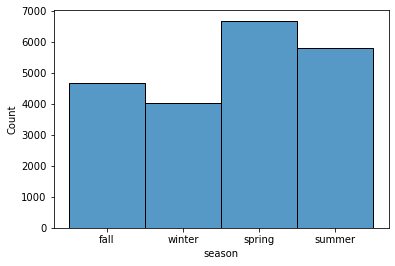

In [14]:
sns.histplot(data=data['season']);

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 7129300520 to 1523300157
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21143 non-null  datetime64[ns]
 1   price          21143 non-null  float64       
 2   bedrooms       21143 non-null  int64         
 3   bathrooms      21143 non-null  float64       
 4   sqft_living    21143 non-null  int64         
 5   sqft_lot       21143 non-null  int64         
 6   floors         21143 non-null  float64       
 7   waterfront     18804 non-null  float64       
 8   view           21082 non-null  float64       
 9   condition      21143 non-null  int64         
 10  grade          21143 non-null  int64         
 11  sqft_above     21143 non-null  int64         
 12  sqft_basement  21143 non-null  float64       
 13  yr_built       21143 non-null  int64         
 14  yr_renovated   21143 non-null  float64       
 15  zipco

Drop variables that will not be apart of the model.

In [16]:
data.drop(['waterfront','view', 'sqft_above', 'zipcode','month', 'yr_renovated','sqft_basement'], axis=1, inplace=True)

In [17]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'has_basement', 'is_renovated',
       'season'],
      dtype='object')

Create a scatterplot for each variable in relationship to price to investigate whether variable are categorical.

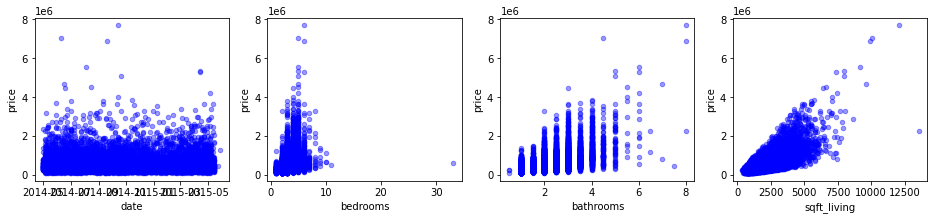

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['date', 'bedrooms', 'bathrooms', 'sqft_living'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

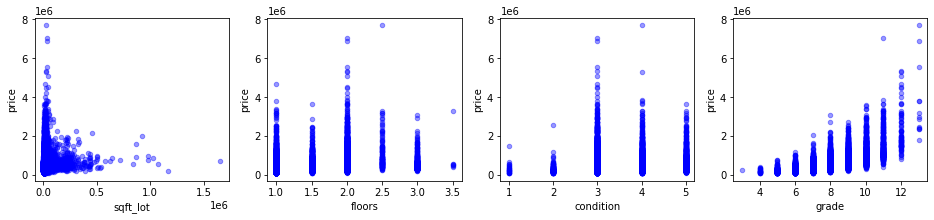

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_lot', 'floors', 'condition', 'grade'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

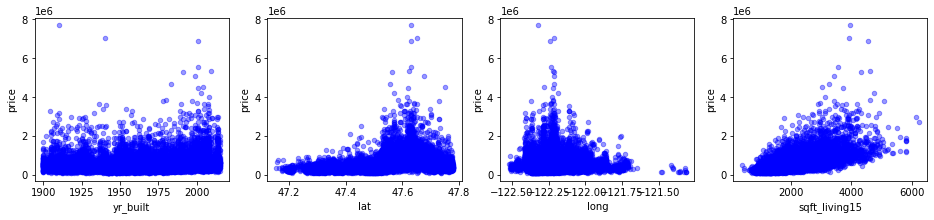

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['yr_built', 'lat', 'long', 'sqft_living15'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

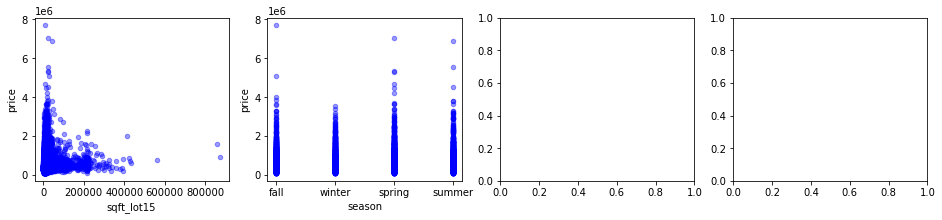

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_lot15','season'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [22]:
#pd.plotting.scatter_matrix(data,figsize  = [20, 20]);
#plt.show()

Create list of discrete variables

In [23]:
discrete_features = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'is_renovated','has_basement', 'season']

Plot a bar graph for each discrete variable.

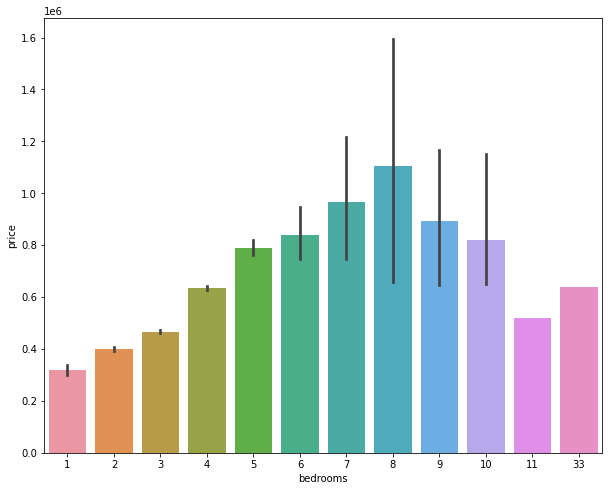

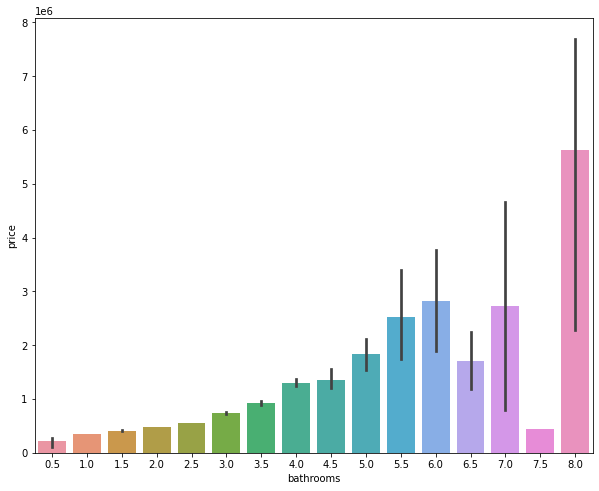

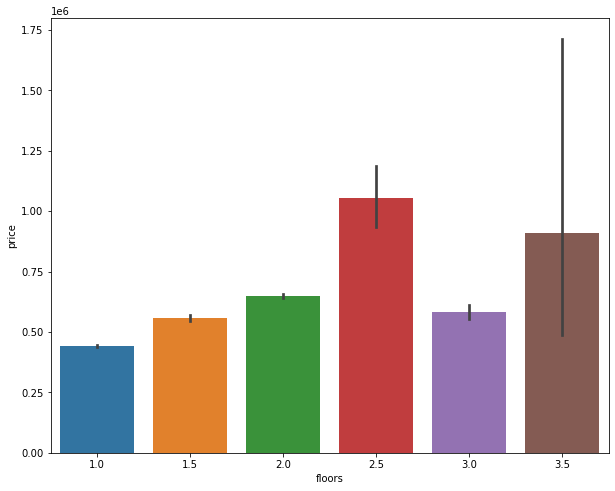

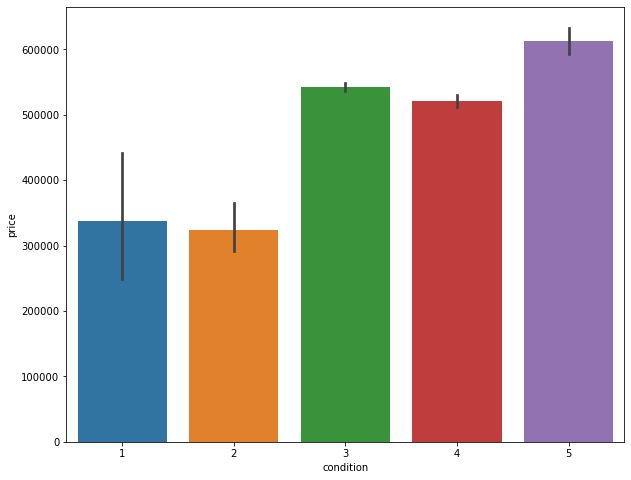

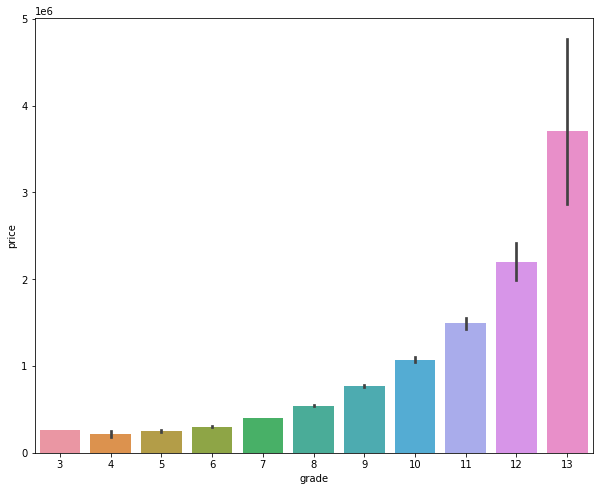

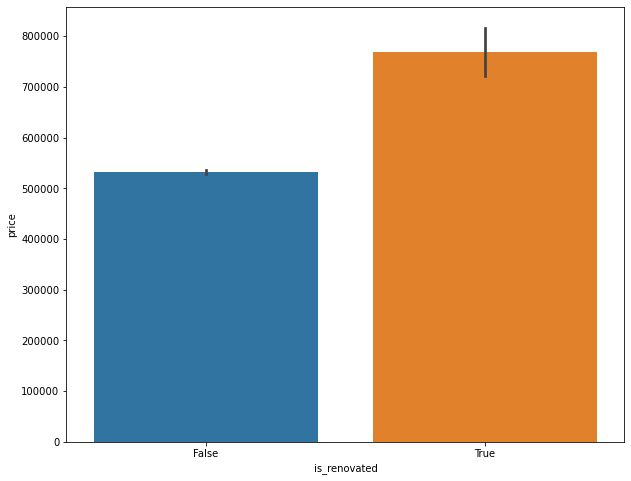

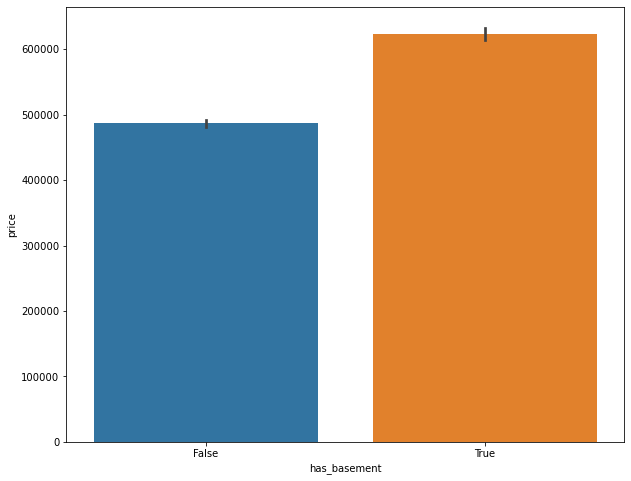

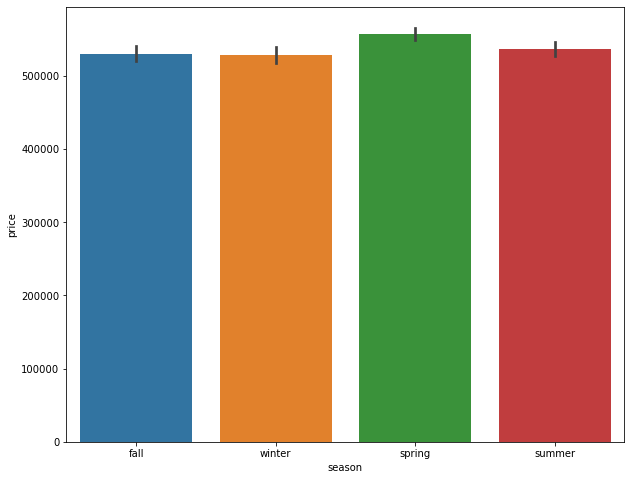

In [24]:
for feature in discrete_features:
    plt.figure(figsize=(10,8))
    sns.barplot(x=feature, y='price', data=data)

In [25]:
data.drop('season', axis=1, inplace=True)

Create a list of the continuous variables.

In [26]:
continuous_features = [feature for feature in data.columns if feature not in discrete_features+['price']+['date']]
continuous_features

['sqft_living',
 'sqft_lot',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

Plot the distribution for each of the continuous variables

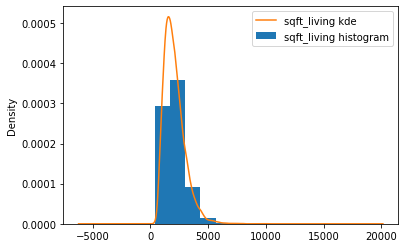

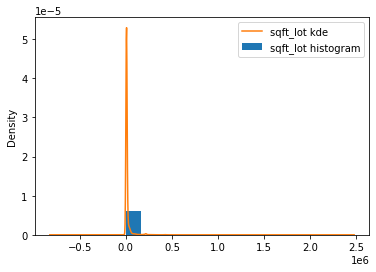

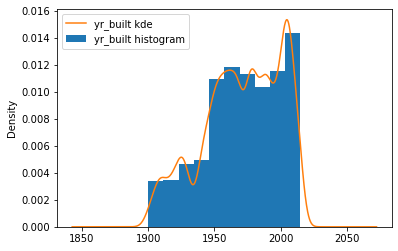

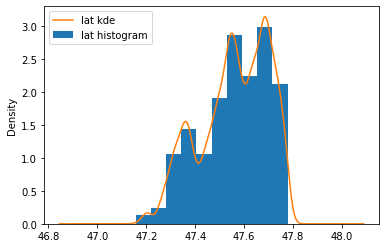

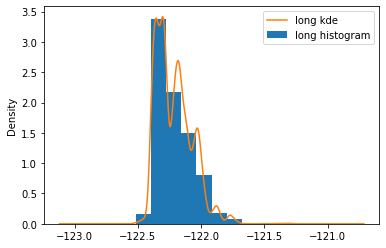

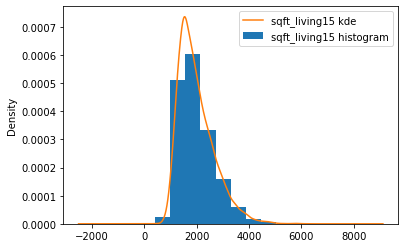

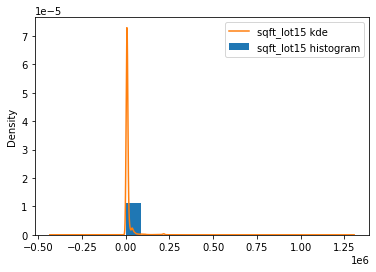

In [27]:
for feature in continuous_features:
    data[feature].plot.hist(density=True, label = feature+' histogram')
    data[feature].plot.kde(label =feature+' kde')
    plt.legend()
    plt.show()

Dealing with Outliers

In [28]:
def lower_limit(col):
    lower_limit = np.mean(col)-3*np.std(col)
    return lower_limit

In [29]:
def upper_limit(col):
    upper_limit = np.mean(col)+3*np.std(col)
    return upper_limit

Removing outliers from continuous variables

In [30]:
data = data[(data['sqft_living'] >= lower_limit(data['sqft_living'])) & (data['sqft_living'] <= upper_limit(data['sqft_living']))]

In [31]:
data = data[(data['sqft_lot'] >= lower_limit(data['sqft_lot'])) & (data['sqft_lot'] <= upper_limit(data['sqft_lot']))]

In [32]:
data = data[(data['sqft_living15'] >= lower_limit(data['sqft_living15'])) & (data['sqft_living15'] <= upper_limit(data['sqft_living15']))]

In [33]:
data = data[(data['sqft_lot15'] >= lower_limit(data['sqft_lot15'])) & (data['sqft_lot15'] <= upper_limit(data['sqft_lot15']))]

In [34]:
data.shape

(20132, 16)

Remove outlier from bedroom data (33 bedrooms with 1620 sqft of living space)

In [35]:
data['bedrooms'].max()

33

In [36]:
data[(data['bedrooms']==33)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,lat,long,sqft_living15,sqft_lot15,has_basement,is_renovated
id,,,,,,,,,,,,,,,,
2402100895,2014-06-25,640000.0,33,2.0,1620,6000,1.0,5,7,1947,47.6878,-122.331,1330,4700,True,False


In [37]:
data = data[(data['bedrooms']!=33)]

Look at the distribution for the continuous variables after removing outliers.

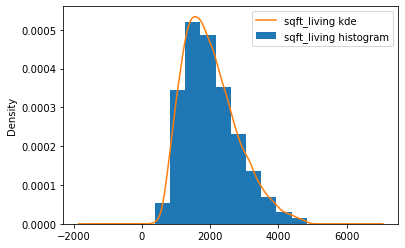

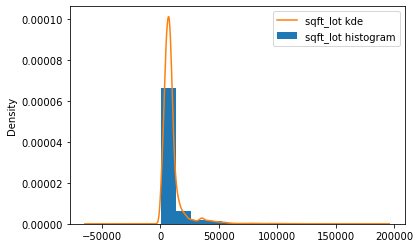

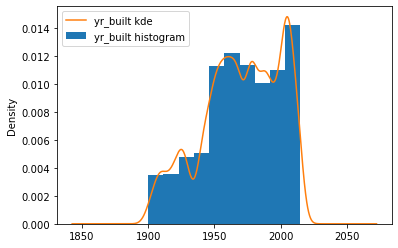

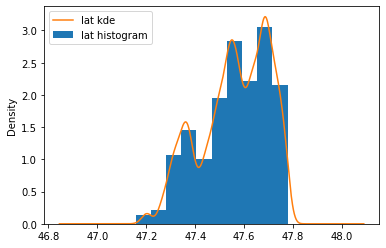

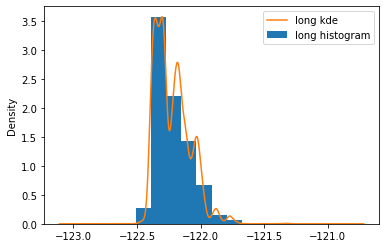

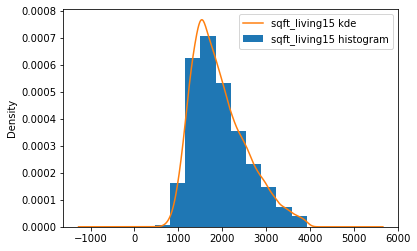

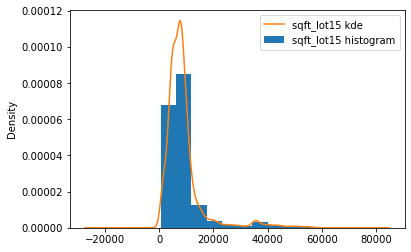

In [38]:
for feature in continuous_features:
    data[feature].plot.hist(density=True, label = feature+' histogram')
    data[feature].plot.kde(label =feature+' kde')
    plt.legend()
    plt.show()

Look at the correlations of each columns with price.

In [39]:
price_corrs = data.corr()["price"].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.646800
grade            0.643538
sqft_living15    0.559596
bathrooms        0.460189
lat              0.363181
bedrooms         0.294626
floors           0.252868
has_basement     0.180632
is_renovated     0.126962
sqft_lot15       0.121899
sqft_lot         0.114814
condition        0.057957
yr_built         0.022790
long             0.003159
Name: price, dtype: float64

Create a heat map to identify correlation between variables to look for issues with multicollinearity.

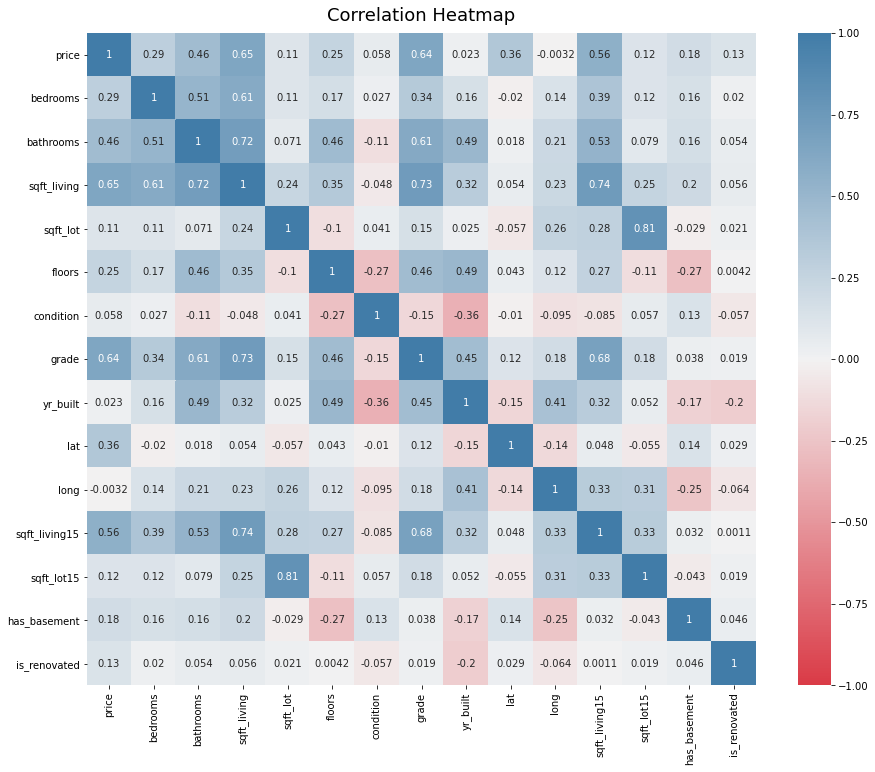

In [40]:
cmap = sns.diverging_palette(10, 240, as_cmap=True)
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Drop the sqft_living15 and sqft_lot15 as they are highly correlated with sqft_living and sqft_lot. 

In [41]:
data.drop(labels = ['sqft_living15','sqft_lot15'], axis=1, inplace=True)

__Create dummy variables__

In [42]:
dummy = pd.get_dummies(data, columns=['is_renovated', 'has_basement'], drop_first=True)
dummy.drop(labels=['date'], axis=1, inplace=True)
dummy

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,lat,long,is_renovated_True,has_basement_True
id,,,,,,,,,,,,,
7129300520,221900.0,3,1.0,1180,5650,1.0,3,7,1955,47.5112,-122.257,0,0
6414100192,538000.0,3,2.0,2570,7242,2.0,3,7,1951,47.7210,-122.319,1,1
5631500400,180000.0,2,1.0,770,10000,1.0,3,6,1933,47.7379,-122.233,0,0
2487200875,604000.0,4,3.0,1960,5000,1.0,5,7,1965,47.5208,-122.393,0,1
1954400510,510000.0,3,2.0,1680,8080,1.0,3,8,1987,47.6168,-122.045,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.5,1530,1131,3.0,3,8,2009,47.6993,-122.346,0,0
6600060120,400000.0,4,2.5,2310,5813,2.0,3,8,2014,47.5107,-122.362,0,0
1523300141,402101.0,2,1.0,1020,1350,2.0,3,7,2009,47.5944,-122.299,0,0


__Train-Test Split__

In [43]:
y = dummy['price']
X = dummy.drop(['price'], axis=1)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16104 4027 16104 4027


__Regression #1 : Using Standardized Variables__

Standard scale all variables

In [46]:
X_train_scaled = (X_train - np.mean(X_train))/ np.std(X_train)
y_train_scaled = (y_train - np.mean(y_train))/ np.std(y_train)

In [47]:
X_test_scaled = (X_test - np.mean(X_test))/ np.std(X_test)
y_test_scaled = (y_test - np.mean(y_test))/ np.std(y_test)

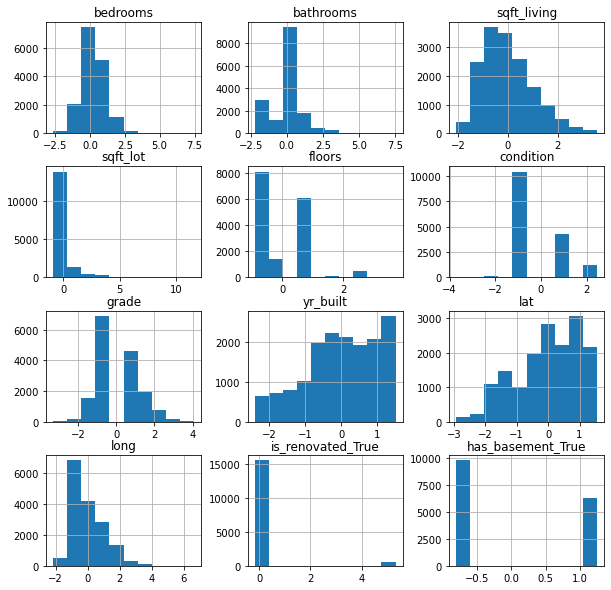

In [48]:
X_train_scaled.hist(figsize=[10,10]);

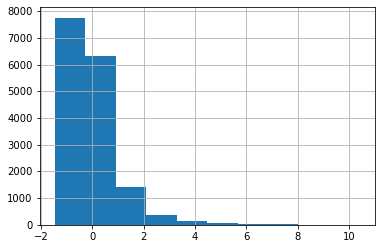

In [49]:
y_train_scaled.hist(figsize=[6,4]);

In [50]:
pred = sm.add_constant(X_train_scaled)
model = sm.OLS(endog=y_train_scaled, exog=pred).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     2369.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:52:29   Log-Likelihood:                -14656.
No. Observations:               16104   AIC:                         2.934e+04
Df Residuals:                   16091   BIC:                         2.944e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.249e-16      0.005   2.64e-14      1.000      -0.009       0.009
bedrooms             -0.0959      0.006    -15.453      0.000      -0.108      -0.084
bathrooms             0.0775      0.008      9.691      0.000       0.062       0.093
sqft_living           0.4254      0.009     44.830      0.000       0.407       0.444
sqft_lot             -0.0145      0.005     -2.792      0.005      -0.025      -0.004
floors                0.0336      0.006      5.212      0.000       0.021       0.046
condition             0.0723      0.005     13.828      0.000       0.062       0.083
grade                 0.4017      0.008     51.587      0.000       0.386       0.417
yr_built             -0.2459      0.007    -34.188      0.000      -0.260      -0.232
lat                   0.2471      0.005     49.373      0.000       0.237       0.257
long                 -0.0331      0.006     -5.864      0.000      -0.044      -0.022
is_renovated_True     0.0366      0.005      7.337      0.000       0.027       0.046
has_basement_True    -0.0076      0.006     -1.334      0.182      -0.019       0.004
==============================================================================
Omnibus:                     9992.609   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           211936.414
Skew:                           2.613   Prob(JB):                         0.00
Kurtosis:                      19.987   Cond. No.                         4.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Evaluate the fit and prediction with the training dataset

In [51]:
X_train1 = X_train_scaled
y_train1 = y_train_scaled
X_test1 = X_test_scaled
y_test1 = y_test_scaled

lr = LinearRegression()
lr.fit(X_train1, y_train1)

y_train_hat1 = lr.predict(X_train1)
mse_train1 = mean_squared_error(y_train1, y_train_hat1)
rmse_train1 = mean_squared_error(y_train1, y_train_hat1, squared=False)
r2_train1 = lr.score(X_train1, y_train1)

print(f'Evaluate Model Prediction with Training Dataset:')
print('------------------------------------------------')
print(f'Mean Squared Error: {mse_train1}')
print(f'Root Mean Squared Error: {rmse_train1}')
print(f'R^2: {r2_train1}')

Evaluate Model Prediction with Training Dataset:
------------------------------------------------
Mean Squared Error: 0.3614264822582079
Root Mean Squared Error: 0.6011875599662787
R^2: 0.6385735177417922


Validate the model with the testing dataset

<ipython-input-52-8c4a1944e451>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


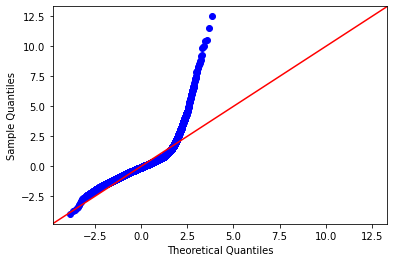

In [52]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

__Regression #2 : Using Log-Scaled & Standardized Variables__

Drop lat and long since ...

In [53]:
X_train_log = pd.DataFrame.copy(X_train)

In [54]:
X_train_log.drop(['lat','long'], axis=1, inplace=True)

In [55]:
X_train_log

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,is_renovated_True,has_basement_True
id,,,,,,,,,,
1937300280,2,1.0,1270,3700,1.5,3,7,1909,0,0
3856901435,4,2.0,1760,4500,1.5,5,7,1906,0,0
2071700010,3,2.0,2580,7434,1.0,3,7,1963,0,1
2254501335,3,2.0,1460,3600,2.0,3,7,1902,0,0
7129300175,4,1.0,1580,8475,1.5,4,7,1928,0,0
...,...,...,...,...,...,...,...,...,...,...
7972604355,3,1.0,1020,7874,1.0,3,7,1956,0,0
9274203036,3,3.0,2950,4446,2.0,3,9,2001,0,1
1954440050,4,2.5,2050,8683,2.0,3,8,1987,0,0


In [56]:
log_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built']
for col in X_train.columns:
    if col in log_col:
        new_log = np.log(X_train_log[col])
        X_train_log[col] = new_log


In [57]:
y_train_log = np.log(y_train)

In [58]:
X_train_log_scaled = (X_train_log - np.mean(X_train_log))/ np.std(X_train_log)
y_train_log_scaled = (y_train_log - np.mean(y_train_log))/ np.std(y_train_log)

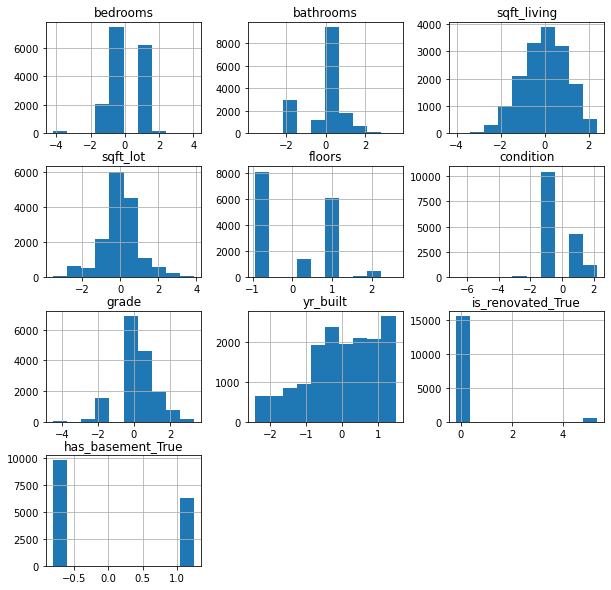

In [59]:
X_train_log_scaled.hist(figsize=[10,10]);

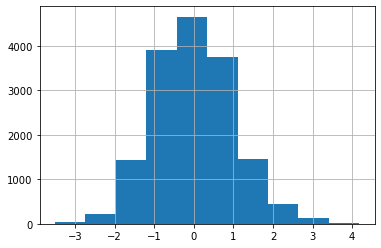

In [60]:
y_train_log_scaled.hist(figsize=[6,4]);

In [61]:
pred2 = sm.add_constant(X_train_log_scaled)
model2 = sm.OLS(endog=y_train_log_scaled, exog=pred2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     2376.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:52:30   Log-Likelihood:                -15548.
No. Observations:               16104   AIC:                         3.112e+04
Df Residuals:                   16093   BIC:                         3.120e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.693e-15      0.005   5.38e-13      1.000      -0.010       0.010
bedrooms             -0.1060      0.007    -15.655      0.000      -0.119      -0.093
bathrooms             0.0743      0.009      8.622      0.000       0.057       0.091
sqft_living           0.3871      0.011     35.042      0.000       0.365       0.409
sqft_lot             -0.0759      0.006    -11.742      0.000      -0.089      -0.063
floors                0.0711      0.008      9.359      0.000       0.056       0.086
condition             0.0510      0.005      9.303      0.000       0.040       0.062
grade                 0.5114      0.008     65.035      0.000       0.496       0.527
yr_built             -0.3438      0.007    -49.131      0.000      -0.357      -0.330
is_renovated_True     0.0112      0.005      2.135      0.033       0.001       0.022
has_basement_True     0.0449      0.006      7.193      0.000       0.033       0.057
==============================================================================
Omnibus:                      122.785   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.108
Skew:                           0.072   Prob(JB):                     7.76e-40
Kurtosis:                       3.498   Cond. No.                         4.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
X_test_log = pd.DataFrame.copy(X_test)

In [63]:
X_test_log.drop(['lat','long'], axis=1, inplace=True)

In [64]:
log_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built']
for col in X_test.columns:
    if col in log_col:
        new_log = np.log(X_test_log[col])
        X_test_log[col] = new_log


In [65]:
y_test_log = np.log(y_test)

In [66]:
X_test_log_scaled = (X_test_log - np.mean(X_test_log))/ np.std(X_test_log)
y_test_log_scaled = (y_test_log - np.mean(y_test_log))/ np.std(y_test_log)

In [67]:
linreg = LinearRegression()
linreg.fit(X_train_log_scaled, y_train_log_scaled)

y_hat_log_scaled_train = linreg.predict(X_train_log_scaled)
y_hat_log_scaled_test = linreg.predict(X_test_log_scaled)

train_log_scaled_mse = mean_squared_error(y_train_log_scaled, y_hat_log_scaled_train)
test_log_scaled_mse = mean_squared_error(y_test_log_scaled, y_hat_log_scaled_test)
print('Train Mean Squarred Error:', train_log_scaled_mse)
print('Test Mean Squarred Error:', test_log_scaled_mse)

Train Mean Squarred Error: 0.40378178743532844
Test Mean Squarred Error: 0.38584014697876995


<ipython-input-68-e51042142ea7>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


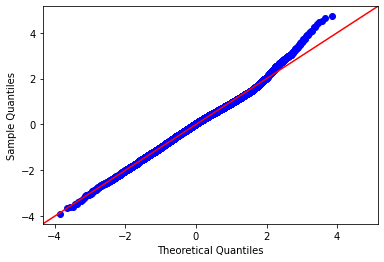

In [68]:
import scipy.stats as stats
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

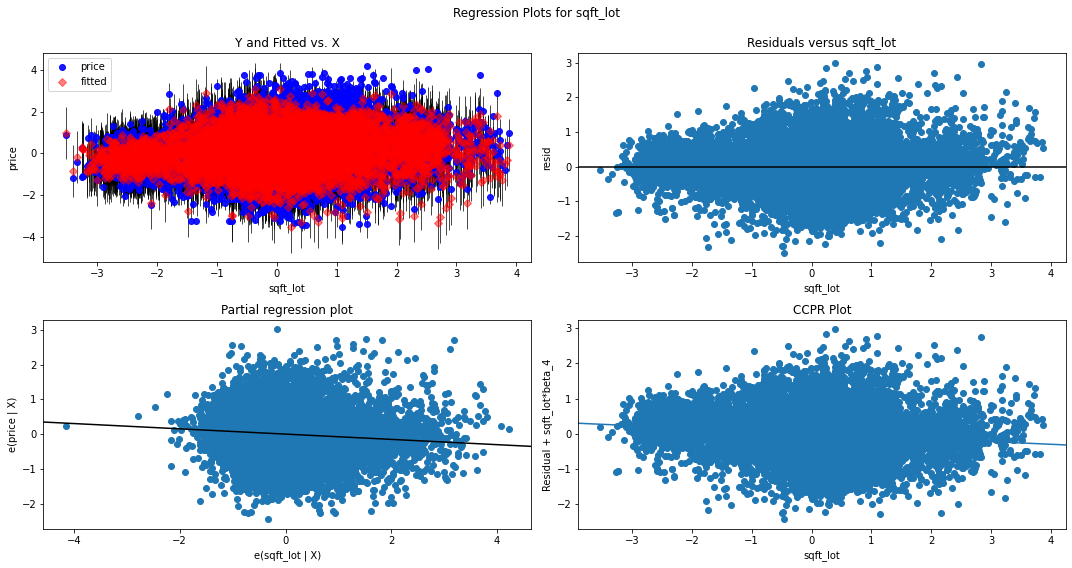

In [69]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "sqft_lot", fig=fig)
plt.show()

__Regression #3 : Recursive Feature Elimination__

In [70]:
from sklearn.feature_selection import RFE

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(pred2, y_train_log_scaled)

In [71]:
selector.support_ 

array([False,  True, False,  True,  True, False, False,  True,  True,
       False, False])

In [72]:
pred2.columns

Index(['const', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built', 'is_renovated_True',
       'has_basement_True'],
      dtype='object')

In [73]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[-0.09793213  0.4771437  -0.11933507  0.52042785 -0.33792747]
1.68500754180973e-15


In [74]:
pred2_columns = list(pred2.columns)
tf = list(selector.support_)
filtered = np.array(pred2_columns)[np.array(tf)]
filtered
pred3 = pred2[filtered]
pred3

,bedrooms,sqft_living,sqft_lot,grade,yr_built
id,,,,,
1937300280,-1.717735,-0.945575,-0.899363,-0.506242,-2.118283
3856901435,0.761269,-0.132643,-0.637387,-0.506242,-2.223415
2071700010,-0.267611,0.820253,0.034448,-0.506242,-0.253642
2254501335,-0.267611,-0.598227,-0.936032,-0.506242,-2.363849
7129300175,0.761269,-0.401436,0.209848,-0.506242,-1.456258
...,...,...,...,...,...
7972604355,-0.267611,-1.491723,0.111406,-0.506242,-0.492440
9274203036,-0.267611,1.154138,-0.653545,1.283340,1.028016
1954440050,0.761269,0.247359,0.242298,0.444620,0.558680


In [75]:
pred3 = sm.add_constant(pred3)
model3 = sm.OLS(endog=y_train_log_scaled, exog=pred3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     4608.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:52:31   Log-Likelihood:                -15697.
No. Observations:               16104   AIC:                         3.141e+04
Df Residuals:                   16098   BIC:                         3.145e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.693e-15      0.005   5.33e-13      1.000      -0.010       0.010
bedrooms       -0.0979      0.007    -14.502      0.000      -0.111      -0.085
sqft_living     0.4771      0.009     51.753      0.000       0.459       0.495
sqft_lot       -0.1193      0.005    -22.031      0.000      -0.130      -0.109
grade           0.5204      0.008     66.652      0.000       0.505       0.536
yr_built       -0.3379      0.006    -58.748      0.000      -0.349      -0.327
==============================================================================
Omnibus:                      110.961   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.685
Skew:                           0.043   Prob(JB):                     1.05e-36
Kurtosis:                       3.489   Cond. No.                         3.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualizations of results

In [76]:
df_graph = dummy.groupby('bathrooms')['price'].mean()
df_graph=pd.DataFrame(df_graph)
df_graph.reset_index(inplace=True)
df_graph.loc[len(df_graph.index)] = ['6.5', 0] 
df_graph.loc[len(df_graph.index)] = ['7.0', 0] 
df_graph['bathrooms']=df_graph['bathrooms'].astype(float, copy=False)

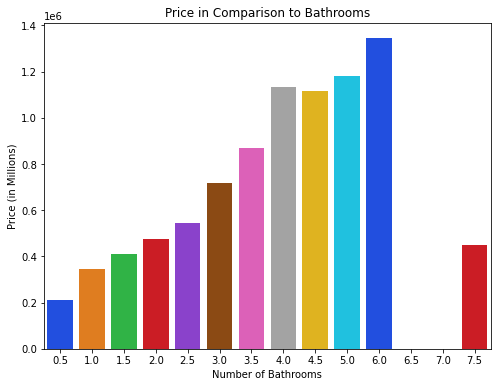

In [94]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x='bathrooms', y='price', data=df_graph, palette="bright")
ax.set_title('Price in Comparison to Bathrooms')
ax.set_xlabel('Number of Bathrooms')
ax.set_ylabel('Price (in Millions)')
#plt.savefig('Bathrooms.png')
#ticks = np.arange(0,15,0.5)
#ax.set_xticks(ticks);

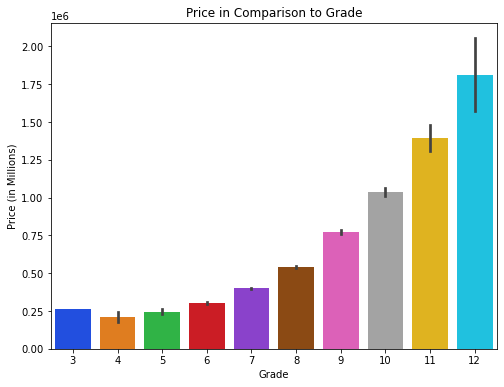

In [96]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x='grade', y='price', data=dummy,palette='bright')
ax.set_title('Price in Comparison to Grade')
ax.set_xlabel('Grade')
ax.set_ylabel('Price (in Millions)');
#plt.savefig('Grade.png')

Playing with latitude and longitude graphing

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=data["long"], y=data["lat"], hue=data['price'], palette="inferno",
                     marker=".")
ax.set( xlabel="Longitude",
        ylabel="Latitude", 
        title="Price by Location");